In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_PATH = Path ('/content/drive/MyDrive/dataset2')

In [ ]:
# Build the datablock
encrypt_datablock = DataBlock(
    get_items = get_image_files,
    get_y = parent_label,
    blocks = (ImageBlock, CategoryBlock),
    splitter = GrandparentSplitter(valid_name = 'test') #splitter
)

In [ ]:
dls = encrypt_datablock.dataloaders(DATASET_PATH)
#dls = dls.cuda() # put data on GPU

In [ ]:
# the model is resnet 152, can change to the different model by change the attribute 
#model = vision_learner(dls, models.resnet50, metrics=accuracy).to('cuda') # put model on GPU
#learn = Learner(dls, model, metrics=accuracy)

learn = vision_learner(dls, models.resnet152, metrics = accuracy)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

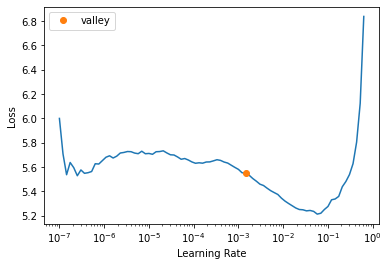

In [ ]:
# find the best learning rate
rate = learn.lr_find()

In [ ]:
# Train the model
learn.fit_one_cycle(13, rate)

epoch,train_loss,valid_loss,accuracy,time
0,3.424570,2.977248,0.264400,12:18
1,2.166122,2.010488,0.458000,02:46
2,1.731326,1.738566,0.534400,02:46
3,1.463386,1.455416,0.601600,02:47
4,1.333821,1.354474,0.624000,02:47
5,1.185350,1.317162,0.641200,02:47
6,1.058250,1.265887,0.660800,02:47
7,0.953280,1.194546,0.678400,02:47
8,0.814475,1.166998,0.688400,02:47
9,0.686502,1.180192,0.693600,02:47


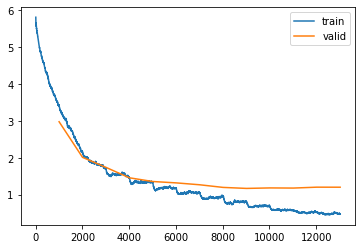

In [ ]:
learn.recorder.plot_loss()

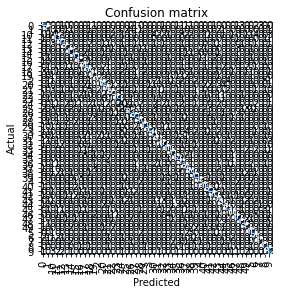

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

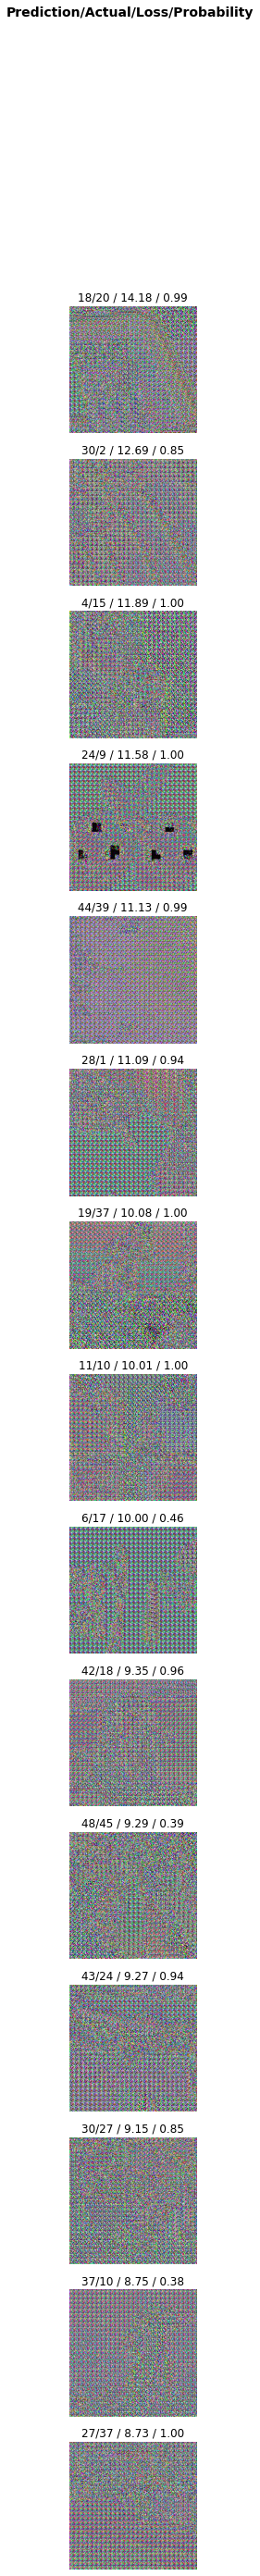

In [ ]:
interp.plot_top_losses(15, nrows = 15)

In [ ]:
# export the model
learn.export('/content/drive/MyDrive/data2_Resnet152_69.pkl')